# Contents
- [Features only vs. baseline](#Features-only-vs.-baseline)
- [Features filtered only vs. baseline](#Features-filtered-only-vs.-baseline)
- [Baseline features filtered with new features vs. baseline](#Baseline-features-filtered-with-new-features-vs.-baseline)
- [Baseline features filtered with new features filtered vs. baseline](#Baseline-features-filtered-with-new-features-filtered-vs.-baseline)

In [60]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *

Load the results Dataframe


In [61]:
df_results = pd.read_feather(RESULTS_FILE_PATH)
df_results.head()

,dataset_id,dataset_name,task_id,n_classes,n_features,n_samples,n_features_ohe,n_features_filtered,pca_clean_n_features_created,pca_clean_creation_time_seconds,kpca_clean_n_features_created,kpca_clean_creation_time_seconds,kmeans_clean_n_features_created,kmeans_clean_creation_time_seconds,lda_clean_n_features_created,lda_clean_creation_time_seconds,pca_filtered_n_features_created,pca_filtered_creation_time_seconds,kpca_filtered_n_features_created,kpca_filtered_creation_time_seconds,kmeans_filtered_n_features_created,kmeans_filtered_creation_time_seconds,lda_filtered_n_features_created,lda_filtered_creation_time_seconds,baseline_filtered_train_cv_score,baseline_filtered_test_score,baseline_filtered_train_time_in_seconds,only_pca_train_cv_score,only_pca_test_score,only_pca_train_time_in_seconds,only_kpca_train_cv_score,only_kpca_test_score,only_kpca_train_time_in_seconds,only_kmeans_train_cv_score,only_kmeans_test_score,only_kmeans_train_time_in_seconds,only_lda_train_cv_score,only_lda_test_score,only_lda_train_time_in_seconds,only_pca_filtered_train_cv_score,only_pca_filtered_test_score,only_pca_filtered_train_time_in_seconds,only_kpca_filtered_train_cv_score,only_kpca_filtered_test_score,only_kpca_filtered_train_time_in_seconds,only_kmeans_filtered_train_cv_score,only_kmeans_filtered_test_score,only_kmeans_filtered_train_time_in_seconds,only_lda_filtered_train_cv_score,only_lda_filtered_test_score,only_lda_filtered_train_time_in_seconds,baseline_filtered_pca_train_cv_score,baseline_filtered_pca_test_score,baseline_filtered_pca_train_time_in_seconds,baseline_filtered_kpca_train_cv_score,baseline_filtered_kpca_test_score,baseline_filtered_kpca_train_time_in_seconds,baseline_filtered_kmeans_train_cv_score,baseline_filtered_kmeans_test_score,baseline_filtered_kmeans_train_time_in_seconds,baseline_filtered_lda_train_cv_score,baseline_filtered_lda_test_score,baseline_filtered_lda_train_time_in_seconds,baseline_filtered_pca_filtered_train_cv_score,baseline_filtered_pca_filtered_test_score,baseline_filtered_pca_filtered_train_time_in_seconds,baseline_filtered_kpca_filtered_train_cv_score,baseline_filtered_kpca_filtered_test_score,baseline_filtered_kpca_filtered_train_time_in_seconds,baseline_filtered_kmeans_filtered_train_cv_score,baseline_filtered_kmeans_filtered_test_score,baseline_filtered_kmeans_filtered_train_time_in_seconds,baseline_filtered_lda_filtered_train_cv_score,baseline_filtered_lda_filtered_test_score,baseline_filtered_lda_filtered_train_time_in_seconds,only_pca_train_score > baseline_filtered_train_score,only_pca_test_score > baseline_filtered_test_score,only_pca_test_score_change_to_baseline_filtered,only_kpca_train_score > baseline_filtered_train_score,only_kpca_test_score > baseline_filtered_test_score,only_kpca_test_score_change_to_baseline_filtered,only_kmeans_train_score > baseline_filtered_train_score,only_kmeans_test_score > baseline_filtered_test_score,only_kmeans_test_score_change_to_baseline_filtered,only_lda_train_score > baseline_filtered_train_score,only_lda_test_score > baseline_filtered_test_score,only_lda_test_score_change_to_baseline_filtered,only_pca_filtered_train_score > baseline_filtered_train_score,only_pca_filtered_test_score > baseline_filtered_test_score,only_pca_filtered_test_score_change_to_baseline_filtered,only_kpca_filtered_train_score > baseline_filtered_train_score,only_kpca_filtered_test_score > baseline_filtered_test_score,only_kpca_filtered_test_score_change_to_baseline_filtered,only_kmeans_filtered_train_score > baseline_filtered_train_score,only_kmeans_filtered_test_score > baseline_filtered_test_score,only_kmeans_filtered_test_score_change_to_baseline_filtered,only_lda_filtered_train_score > baseline_filtered_train_score,only_lda_filtered_test_score > baseline_filtered_test_score,only_lda_filtered_test_score_change_to_baseline_filtered,baseline_filtered_pca_train_score > baseline_filtered_train_score,baseline_filtered_pca_test_score > baseline_filtered_test_score,baseline_filtered

In [62]:
for column in df_results.columns:
    print(column)

dataset_id
dataset_name
task_id
n_classes
n_features
n_samples
n_features_ohe
n_features_filtered
pca_clean_n_features_created
pca_clean_creation_time_seconds
kpca_clean_n_features_created
kpca_clean_creation_time_seconds
kmeans_clean_n_features_created
kmeans_clean_creation_time_seconds
lda_clean_n_features_created
lda_clean_creation_time_seconds
pca_filtered_n_features_created
pca_filtered_creation_time_seconds
kpca_filtered_n_features_created
kpca_filtered_creation_time_seconds
kmeans_filtered_n_features_created
kmeans_filtered_creation_time_seconds
lda_filtered_n_features_created
lda_filtered_creation_time_seconds
baseline_filtered_train_cv_score
baseline_filtered_test_score
baseline_filtered_train_time_in_seconds
only_pca_train_cv_score
only_pca_test_score
only_pca_train_time_in_seconds
only_kpca_train_cv_score
only_kpca_test_score
only_kpca_train_time_in_seconds
only_kmeans_train_cv_score
only_kmeans_test_score
only_kmeans_train_time_in_seconds
only_lda_train_cv_score
only_lda_te

# Features only vs. baseline

In [63]:
df = df_results.loc[:, df_results.columns.str.contains("only_[a-zA-Z]+_test_score_change_to_baseline_filtered|dataset_id", regex=True)]
df.head()

,dataset_id,only_pca_test_score_change_to_baseline_filtered,only_kpca_test_score_change_to_baseline_filtered,only_kmeans_test_score_change_to_baseline_filtered,only_lda_test_score_change_to_baseline_filtered
0,3,-10.943396,-6.320755,-44.905660,-2.358491
1,6,-14.540150,-14.002764,-45.938891,-3.546753
2,11,-37.096774,-29.569892,-10.752688,3.763441
3,12,-8.909370,-7.987711,-29.953917,2.764977
4,14,-23.183391,-14.532872,-81.833910,-1.903114


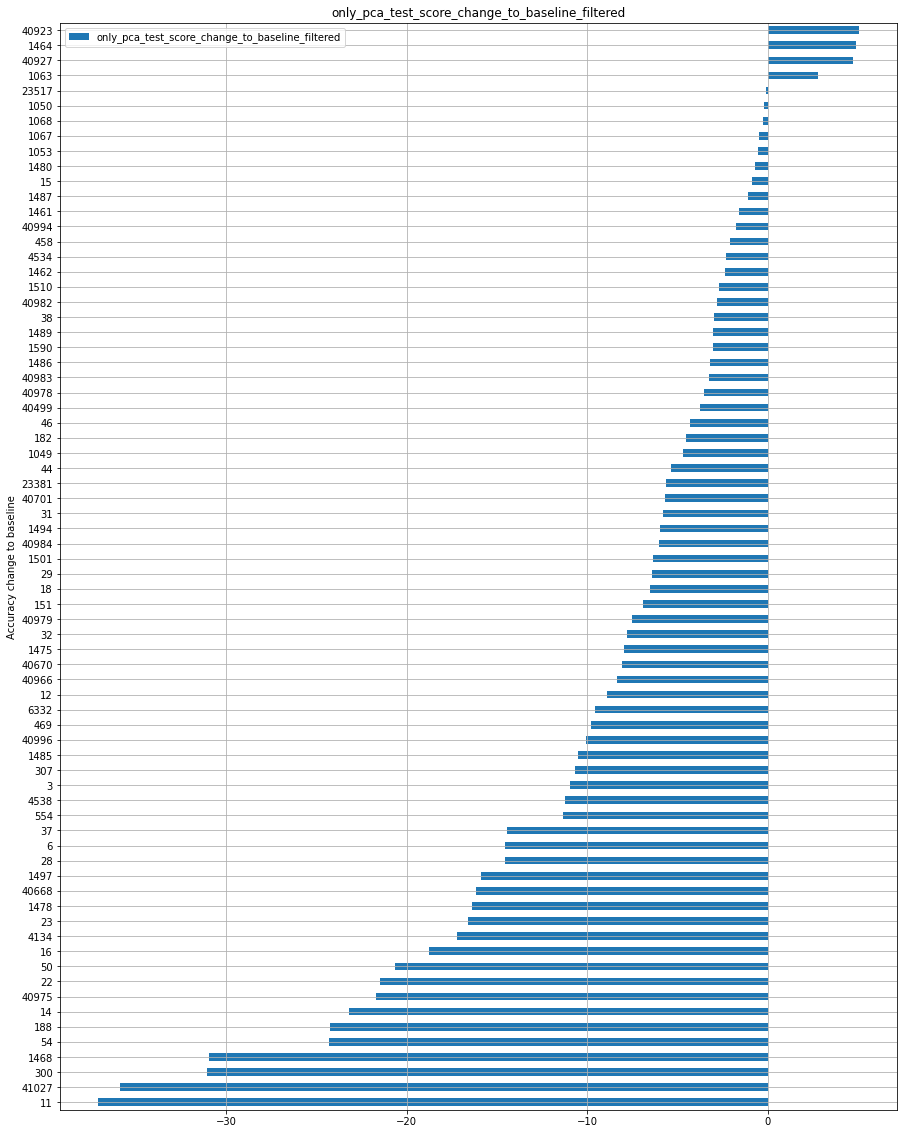

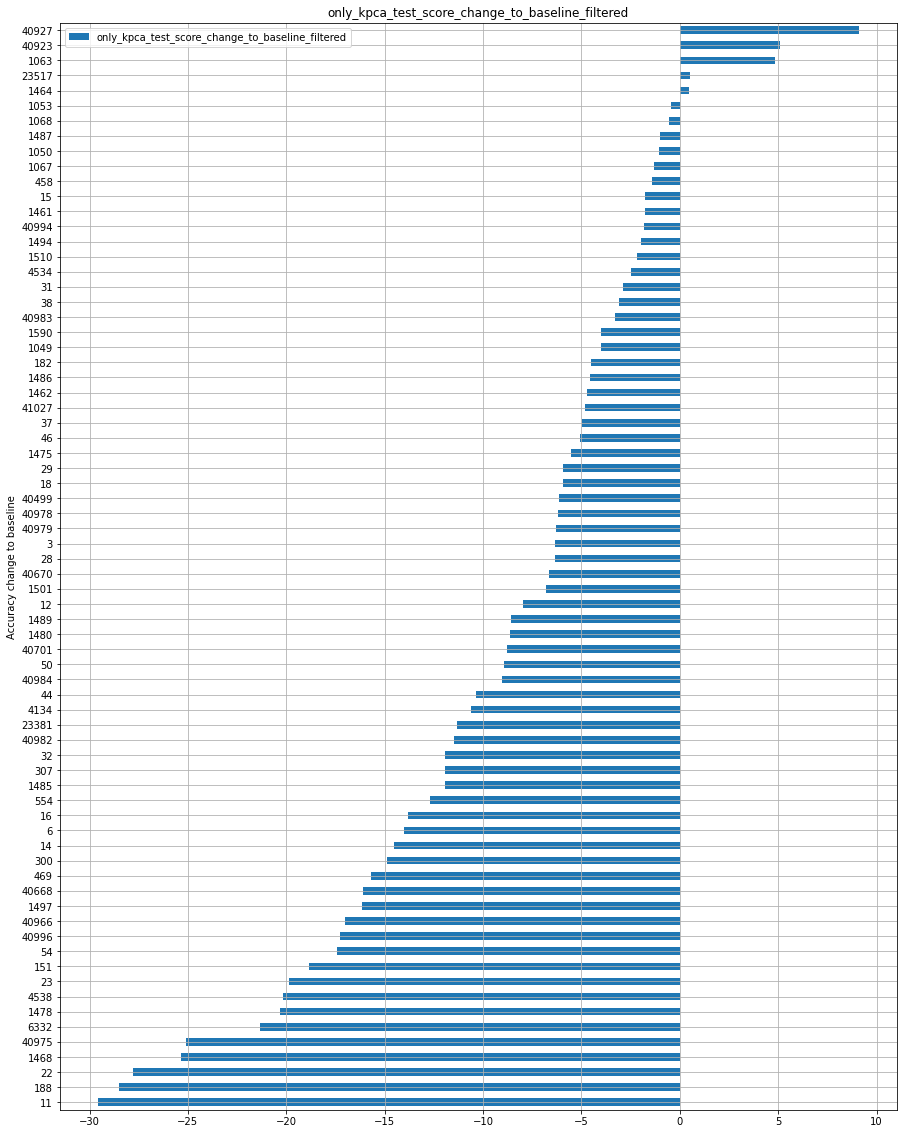

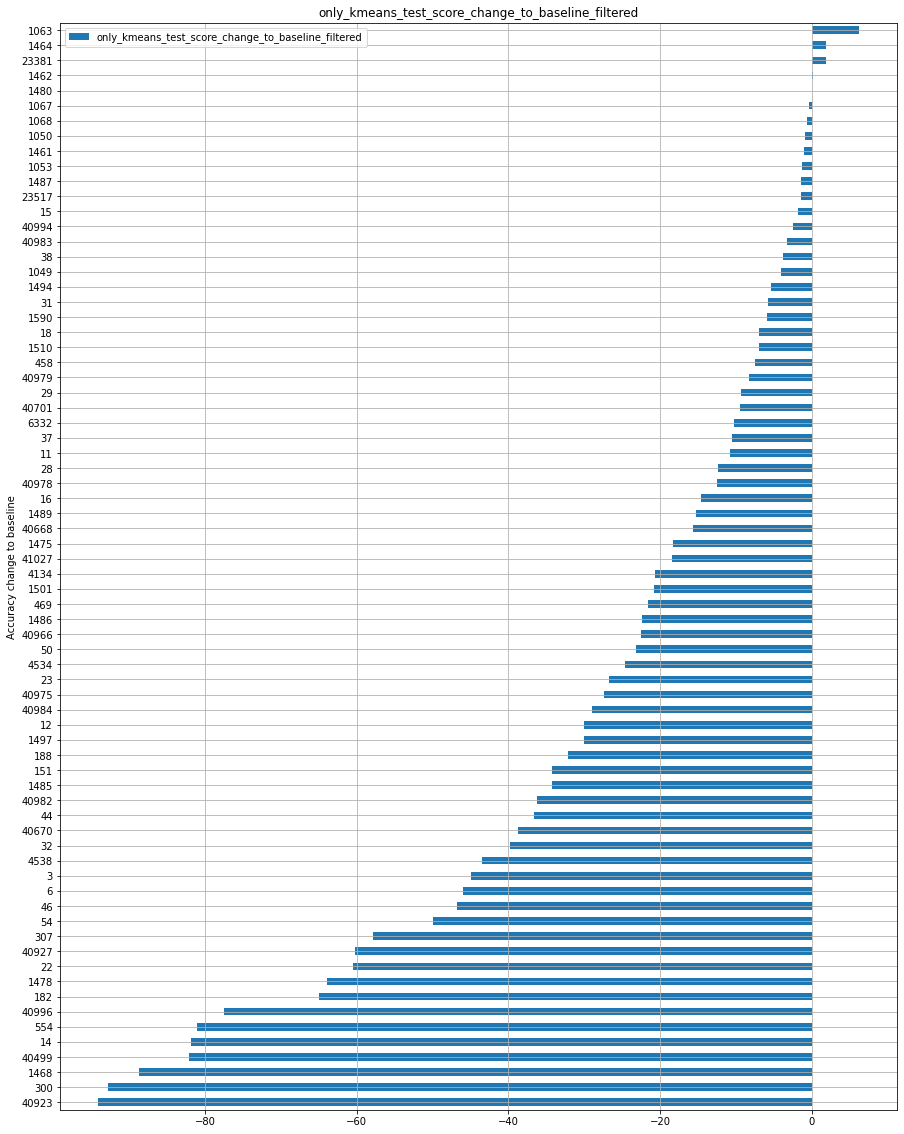

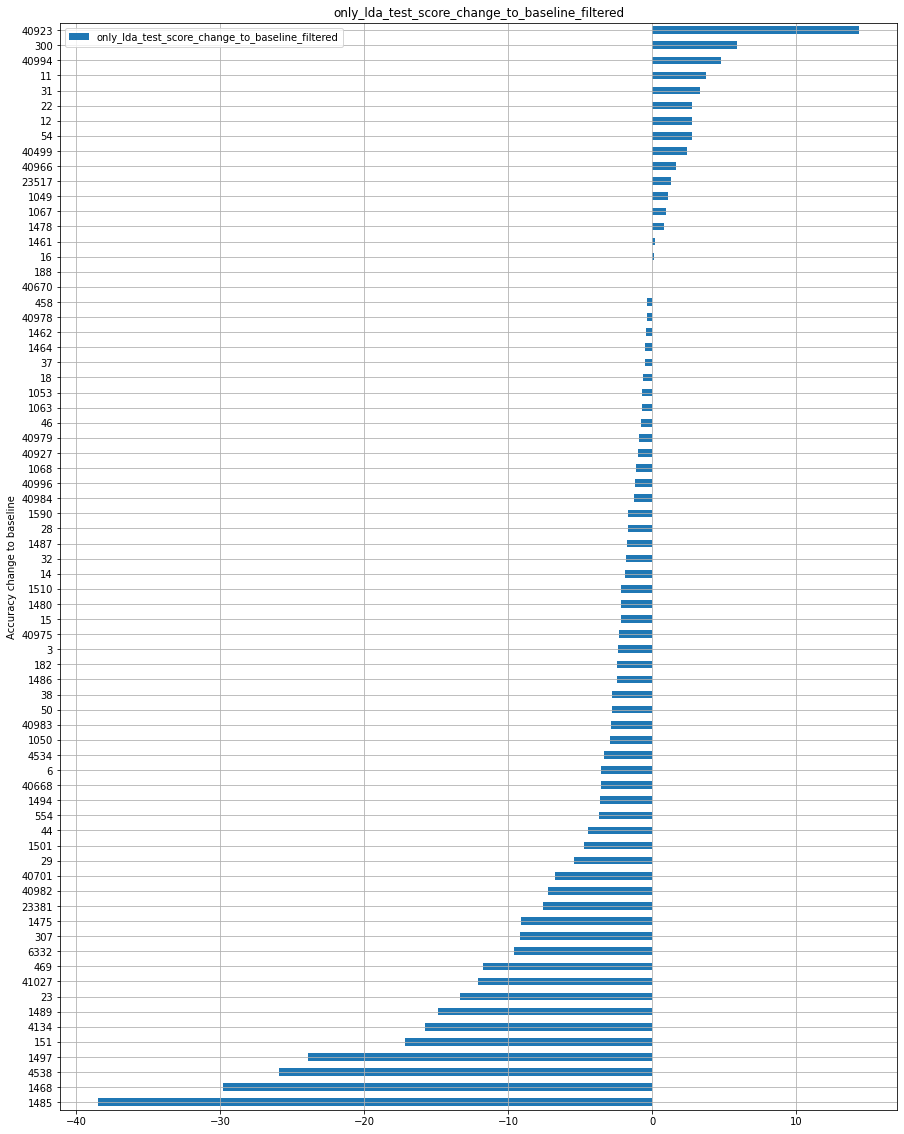

In [64]:
df_feature_columns = list(df.columns)
df_feature_columns.remove("dataset_id")

for feature_column in df_feature_columns:
    df[["dataset_id", feature_column]].\
        sort_values(
            by=feature_column,
            ascending=True,
        ).\
        plot.barh(
            x="dataset_id",
            y=feature_column,
            #color=(df[feature_column] > 0).map({True: 'g', False:'r'}), # do not work
            figsize=(15, 20),
            title=feature_column,
            grid=True,
            xlabel="Accuracy change to baseline",
            ylabel="Dataset id",
    )


# Features filtered only vs. baseline


In [65]:
df = df_results.loc[:, df_results.columns.str.contains("only_[a-zA-Z]+_filtered_test_score_change_to_baseline_filtered|dataset_id", regex=True)]
df.head()

,dataset_id,only_pca_filtered_test_score_change_to_baseline_filtered,only_kpca_filtered_test_score_change_to_baseline_filtered,only_kmeans_filtered_test_score_change_to_baseline_filtered,only_lda_filtered_test_score_change_to_baseline_filtered
0,3,-3.396226,-5.377358,-18.773585,-3.207547
1,6,-15.077537,-16.920006,-42.545678,-2.871181
2,11,-37.096774,-29.569892,-10.752688,3.763441
3,12,-5.376344,-7.219662,-25.960061,0.921659
4,14,-15.397924,-4.498270,-35.640138,-2.422145


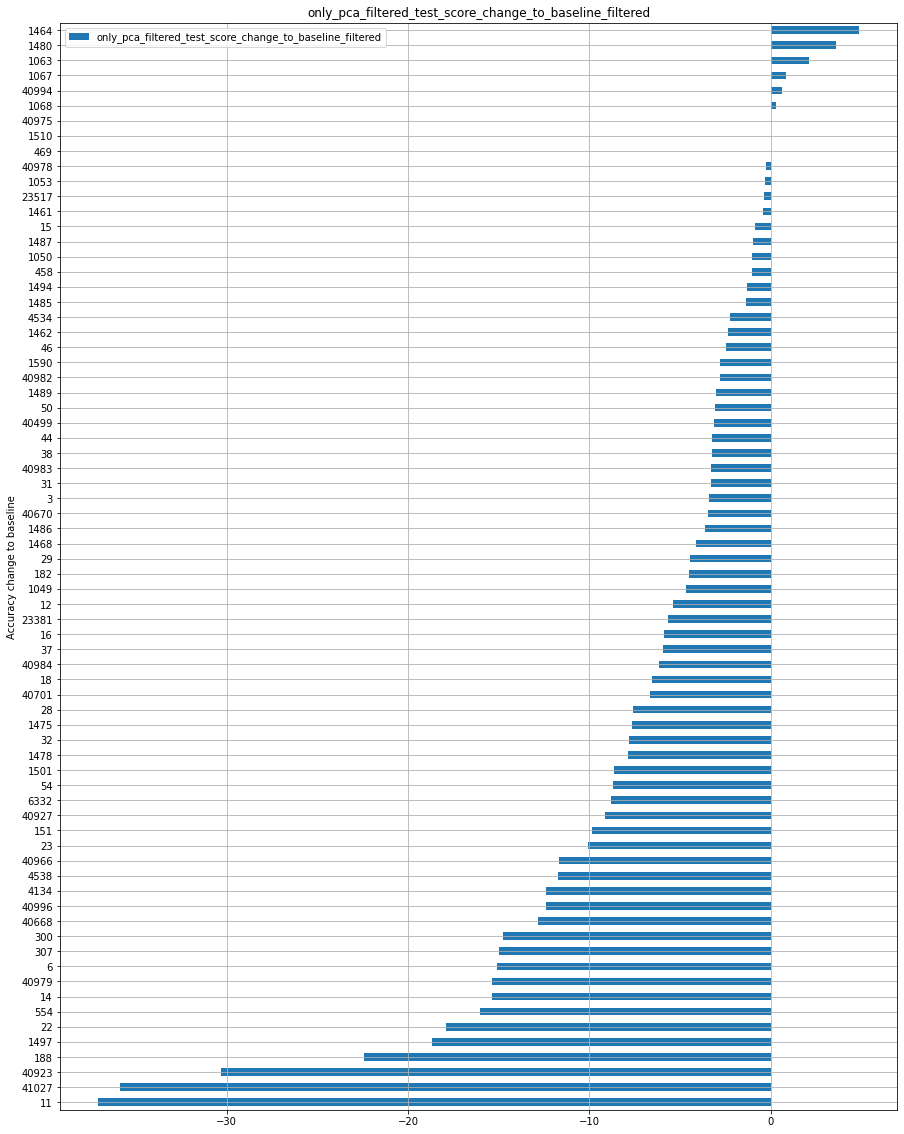

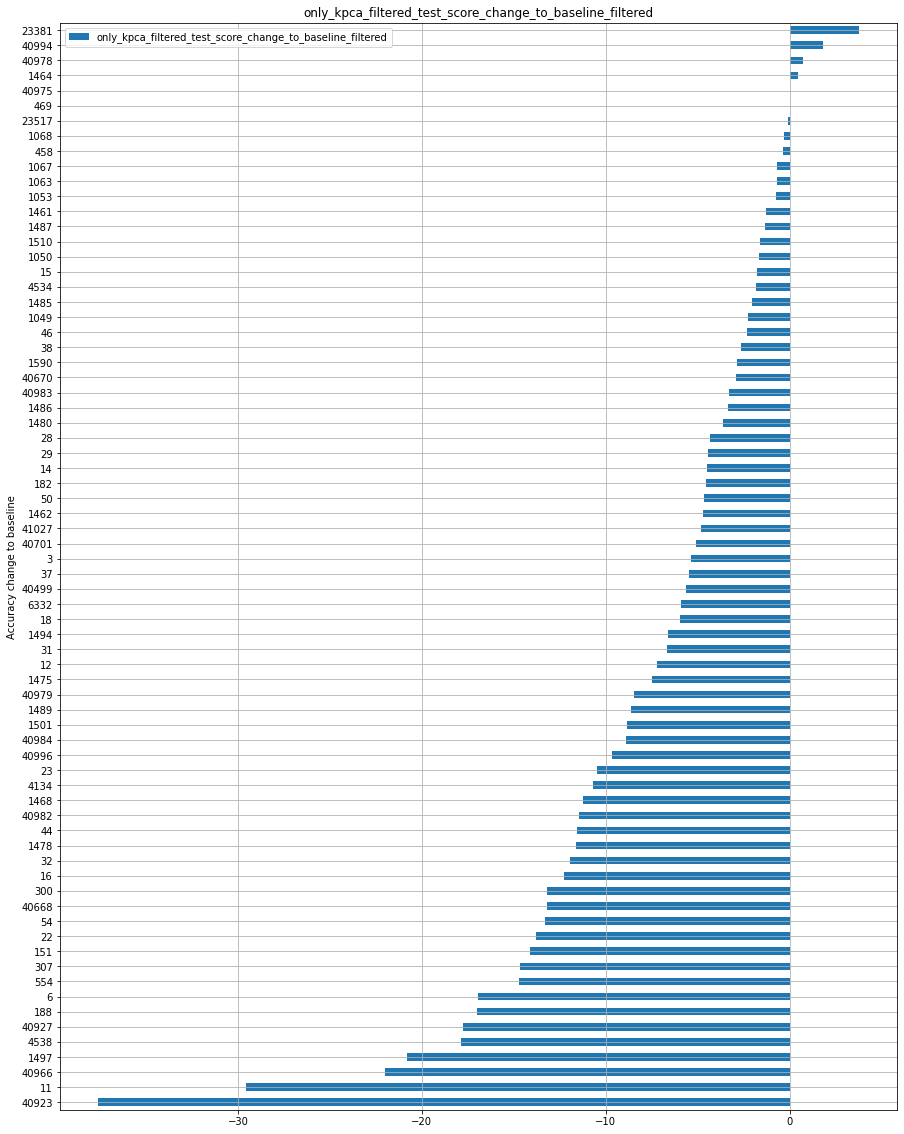

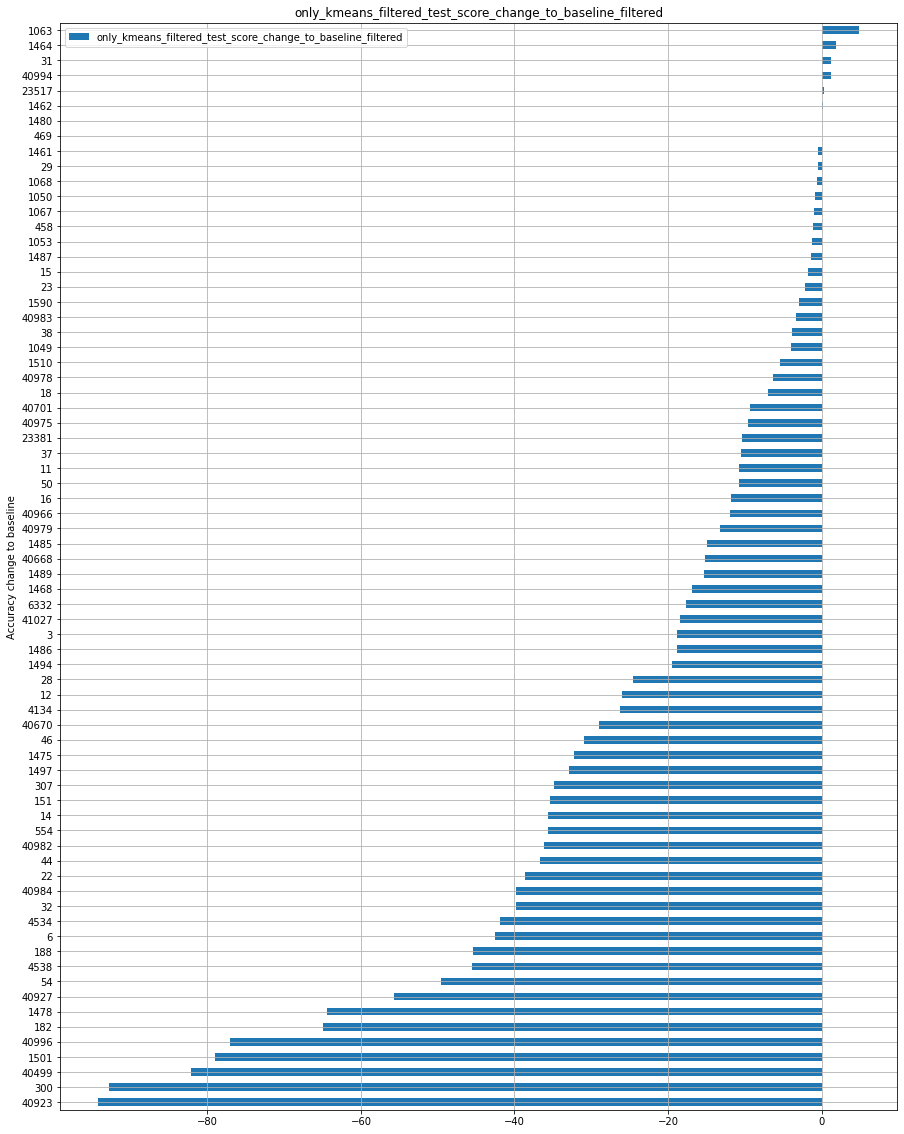

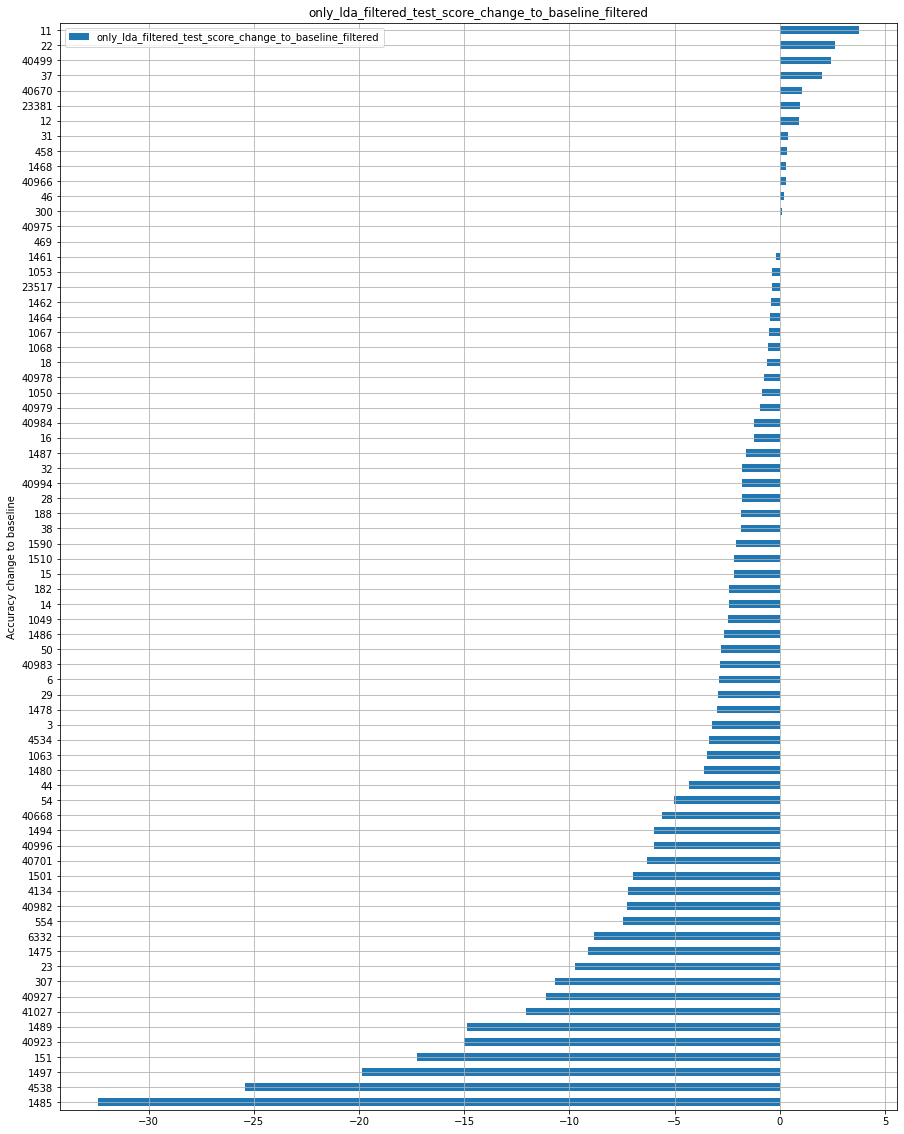

In [66]:
df_feature_columns = list(df.columns)
df_feature_columns.remove("dataset_id")

for feature_column in df_feature_columns:
    df[["dataset_id", feature_column]].\
        sort_values(
            by=feature_column,
            ascending=True,
        ).\
        plot.barh(
            x="dataset_id",
            y=feature_column,
            #color=(df[feature_column] > 0).map({True: 'g', False:'r'}), # do not work
            figsize=(15, 20),
            title=feature_column,
            grid=True,
            xlabel="Accuracy change to baseline",
            ylabel="Dataset id",
    )

# Baseline features filtered with new features vs. baseline

In [67]:
df = df_results.loc[:, df_results.columns.str.contains("baseline_filtered_[a-zA-Z]+_test_score_change_to_baseline_filtered|dataset_id", regex=True)]
df.head()

,dataset_id,baseline_filtered_pca_test_score_change_to_baseline_filtered,baseline_filtered_kpca_test_score_change_to_baseline_filtered,baseline_filtered_kmeans_test_score_change_to_baseline_filtered,baseline_filtered_lda_test_score_change_to_baseline_filtered
0,3,1.415094,1.320755,0.188679,1.415094
1,6,-0.322432,-0.875173,-0.015354,0.000000
2,11,-4.301075,-3.225806,-3.225806,5.913978
3,12,-0.153610,-0.460829,-0.307220,2.457757
4,14,0.346021,-1.730104,-0.692042,-1.730104


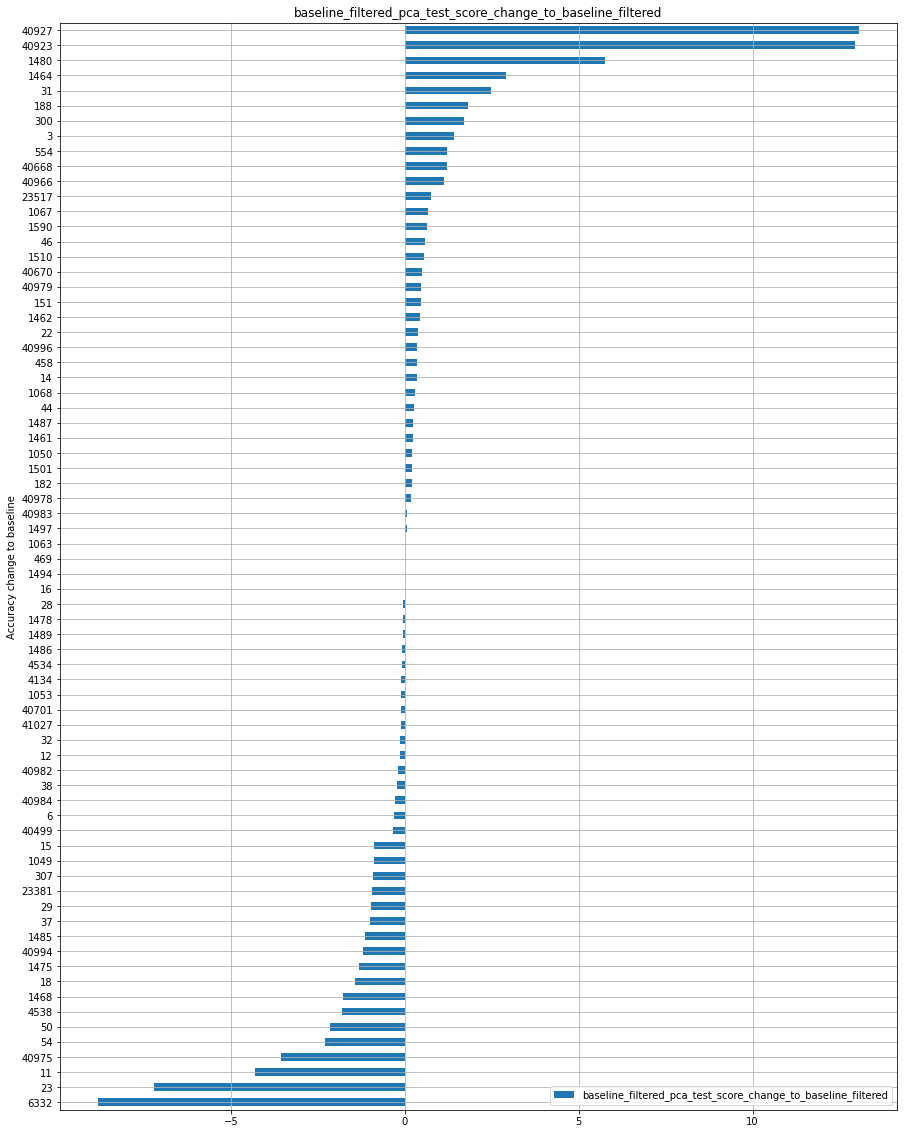

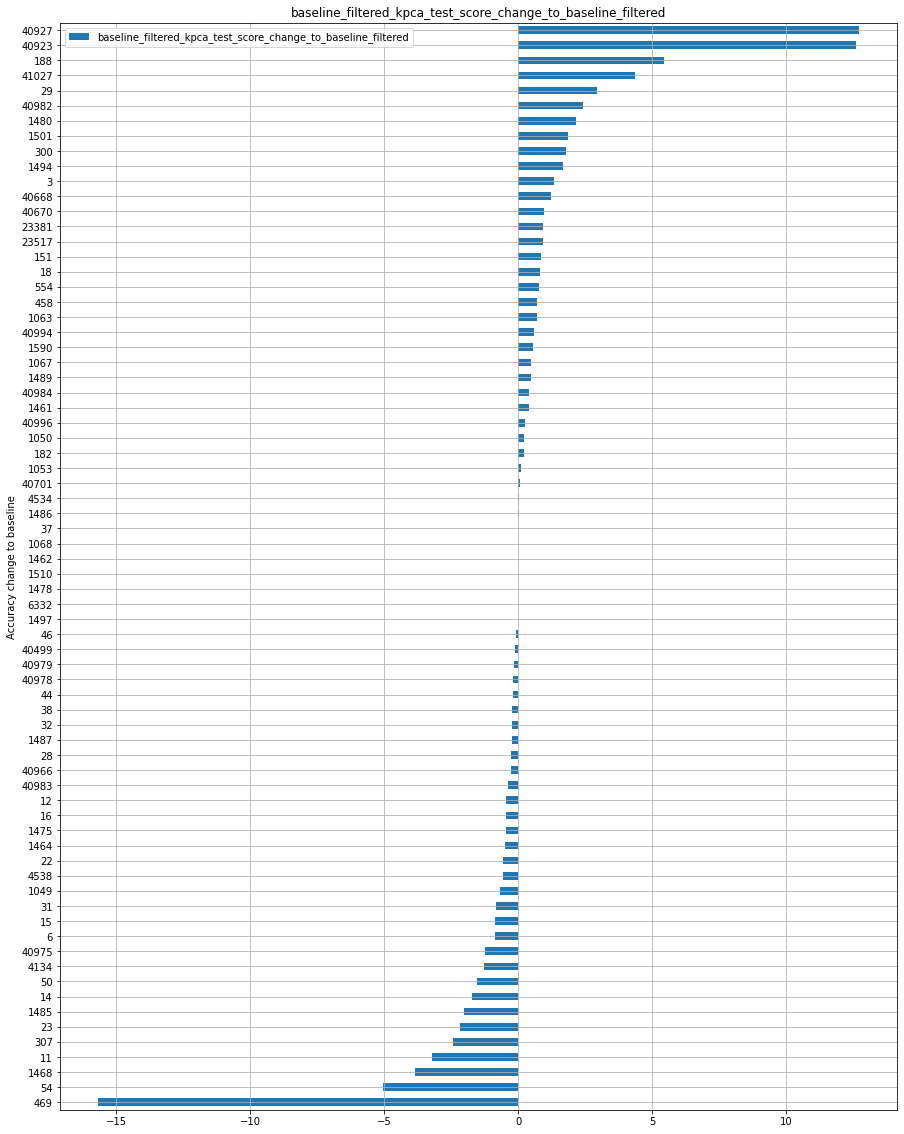

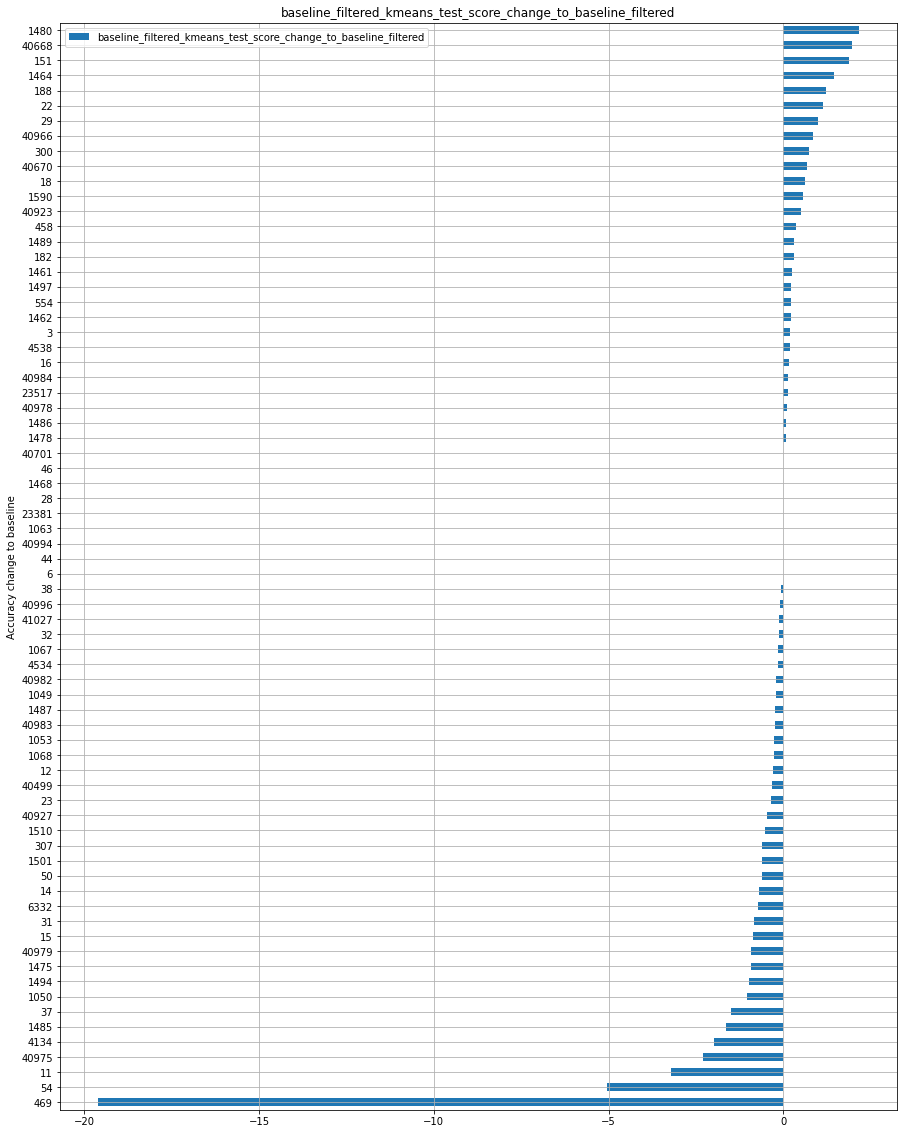

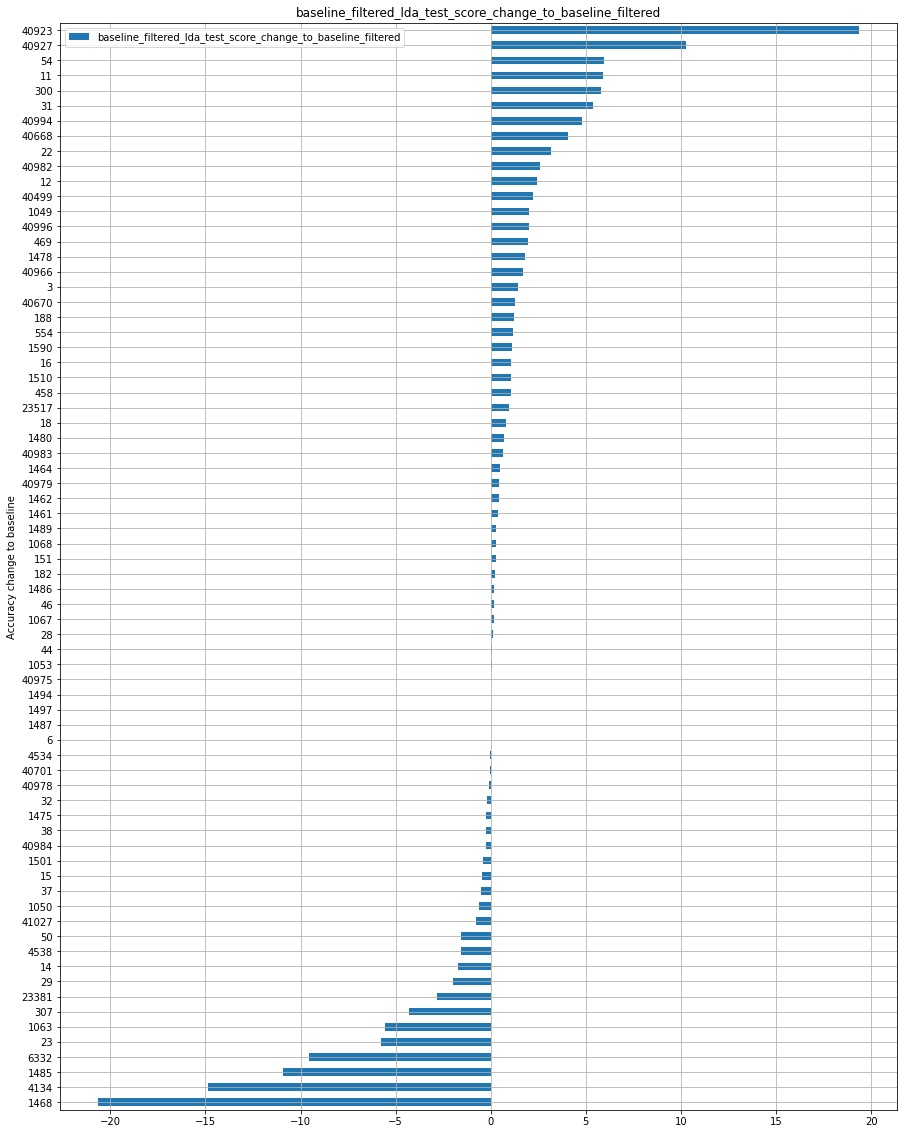

In [68]:
df_feature_columns = list(df.columns)
df_feature_columns.remove("dataset_id")

for feature_column in df_feature_columns:
    df[["dataset_id", feature_column]].\
        sort_values(
            by=feature_column,
            ascending=True,
        ).\
        plot.barh(
            x="dataset_id",
            y=feature_column,
            #color=(df[feature_column] > 0).map({True: 'g', False:'r'}), # do not work
            figsize=(15, 20),
            title=feature_column,
            grid=True,
            xlabel="Accuracy change to baseline",
            ylabel="Dataset id",
    )

# Baseline features filtered with new features filtered vs. baseline

In [70]:
df = df_results.loc[:, df_results.columns.str.contains("baseline_filtered_[a-zA-Z]+_filtered_test_score_change_to_baseline_filtered|dataset_id", regex=True)]
df.head()

,dataset_id,baseline_filtered_pca_filtered_test_score_change_to_baseline_filtered,baseline_filtered_kpca_filtered_test_score_change_to_baseline_filtered,baseline_filtered_kmeans_filtered_test_score_change_to_baseline_filtered,baseline_filtered_lda_filtered_test_score_change_to_baseline_filtered
0,3,0.000000,0.283019,0.283019,0.377358
1,6,-0.859819,-0.491325,-0.261016,-0.122831
2,11,-4.301075,-3.225806,-3.225806,5.913978
3,12,-0.614439,-0.153610,-0.460829,1.382488
4,14,-1.384083,0.000000,-0.346021,-0.173010


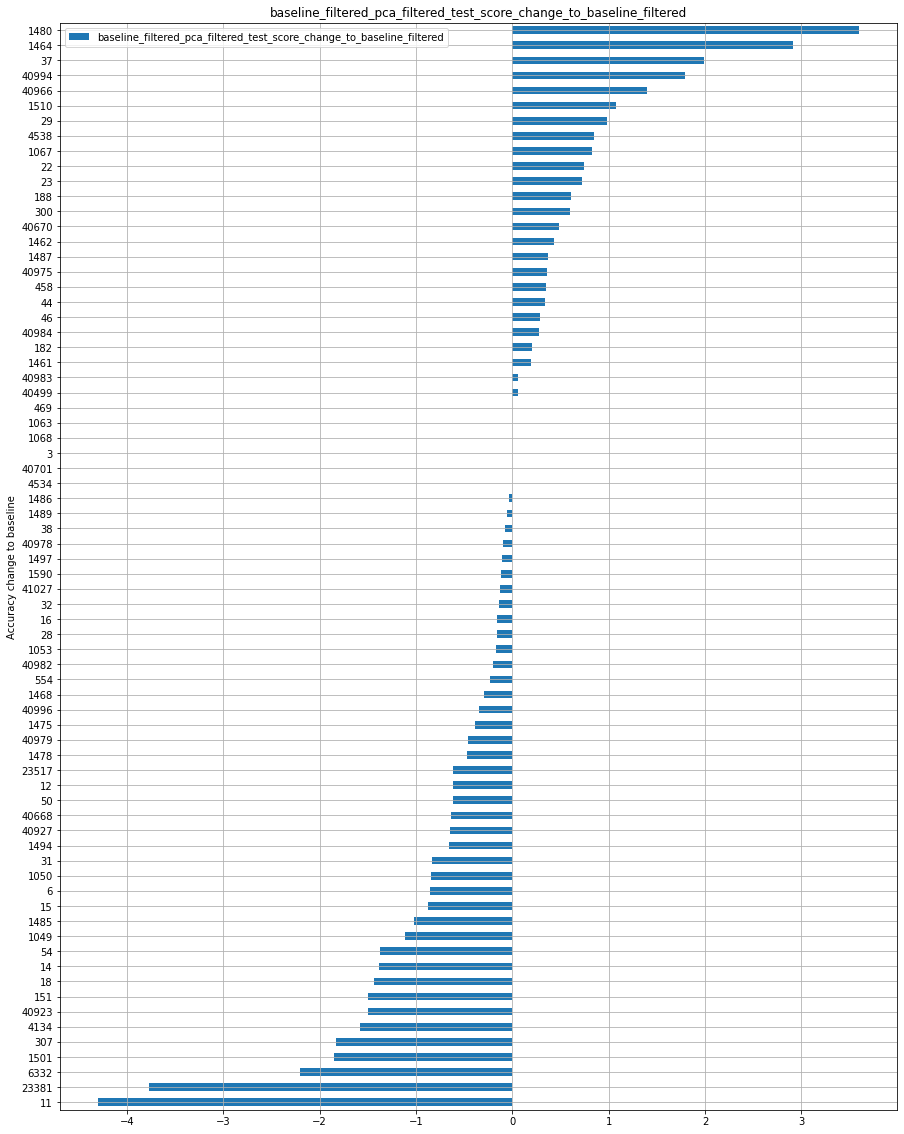

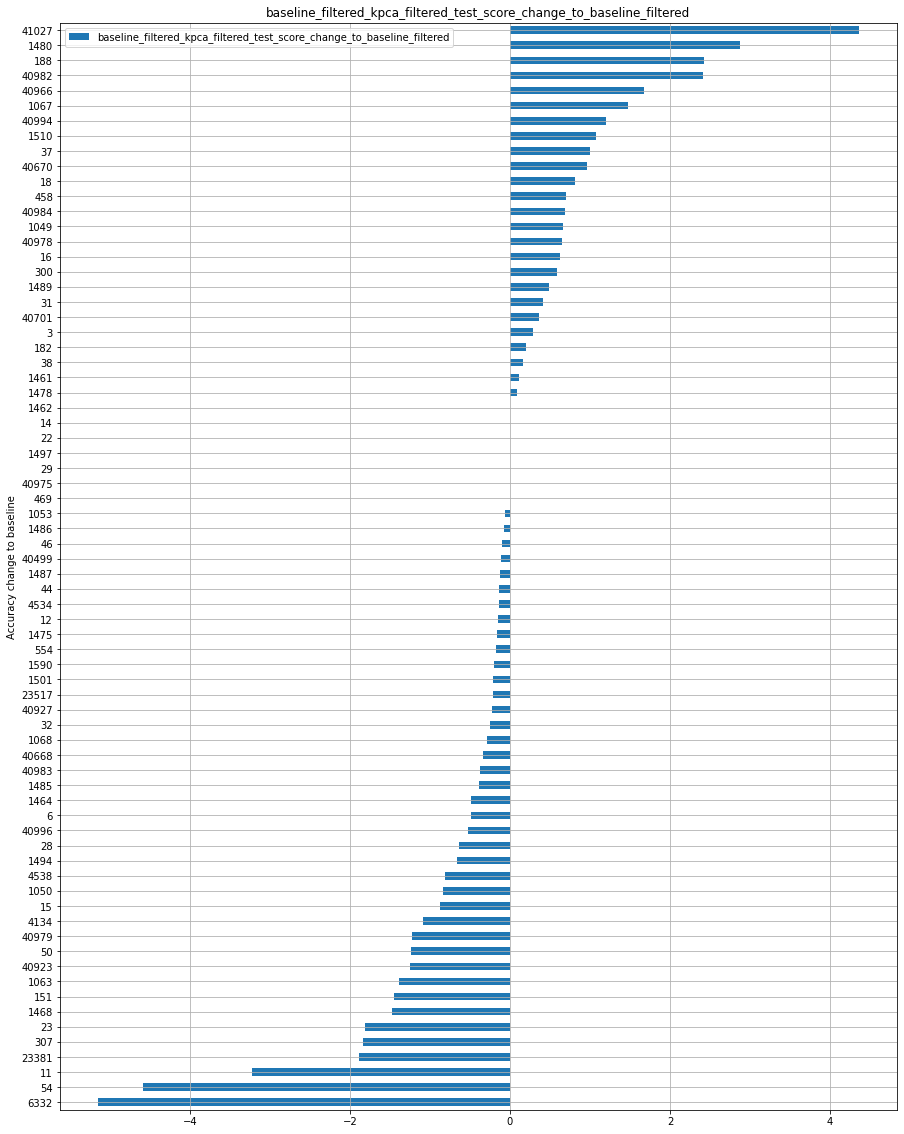

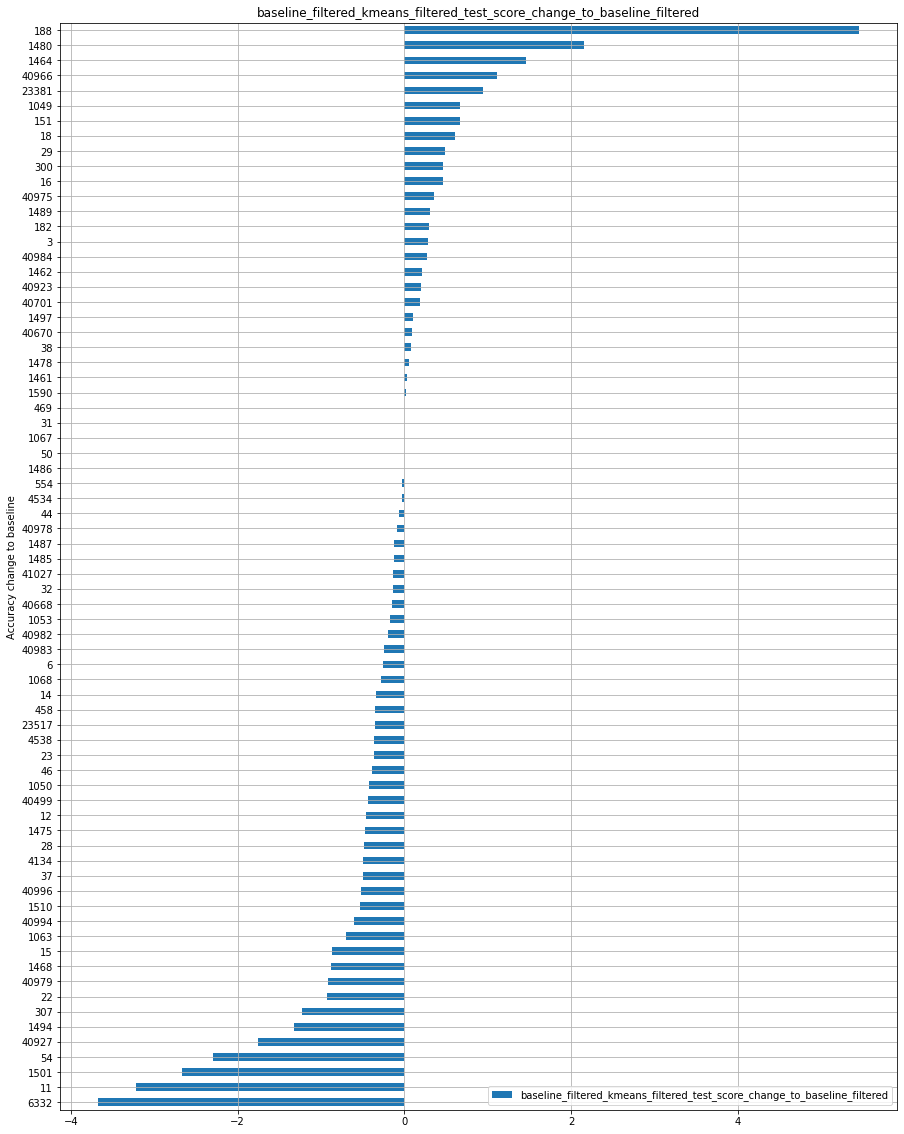

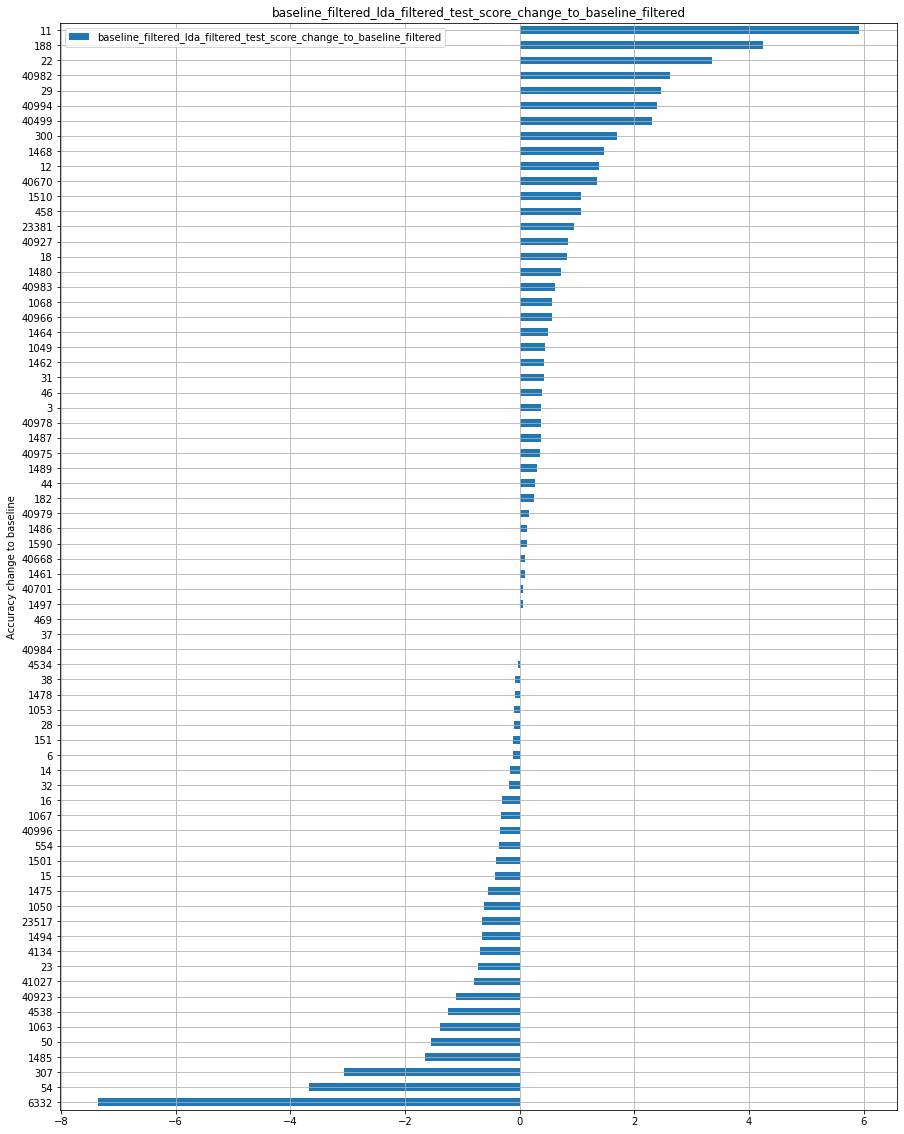

In [71]:
df_feature_columns = list(df.columns)
df_feature_columns.remove("dataset_id")

for feature_column in df_feature_columns:
    df[["dataset_id", feature_column]].\
        sort_values(
            by=feature_column,
            ascending=True,
        ).\
        plot.barh(
            x="dataset_id",
            y=feature_column,
            #color=(df[feature_column] > 0).map({True: 'g', False:'r'}), # do not work
            figsize=(15, 20),
            title=feature_column,
            grid=True,
            xlabel="Accuracy change to baseline",
            ylabel="Dataset id",
    )